In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data.describe()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
#print((data[list(data)].isna()).sum())
#from __future__ import division
#drop_col = []
for i in list(data):
    #print(data[i].isna().sum())/400
    #if (data[i].isna().sum() / 400) > 0.20:
        #drop_col.append(i)
    print(i , (data[i].isna().sum()))        
#print(drop_col)
     
        


('id', 0)
('age', 9)
('bp', 12)
('sg', 47)
('al', 46)
('su', 49)
('rbc', 152)
('pc', 65)
('pcc', 4)
('ba', 4)
('bgr', 44)
('bu', 19)
('sc', 17)
('sod', 87)
('pot', 88)
('hemo', 52)
('pcv', 70)
('wc', 105)
('rc', 130)
('htn', 2)
('dm', 2)
('cad', 2)
('appet', 1)
('pe', 1)
('ane', 1)
('classification', 0)


In [5]:
# now will the preprocessing begins

In [6]:
cols = data.columns
a = data._get_numeric_data().columns

print(list(set(cols) - set(a)))

data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})

data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})

data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})

data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})


['ane', 'dm', 'wc', 'ba', 'classification', 'htn', 'rc', 'pcv', 'pc', 'pe', 'pcc', 'appet', 'rbc', 'cad']


In [7]:
data['pe'] = data['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good

data['appet'] = data['appet'].replace(to_replace='no',value=0)

data['cad'] = data['cad'].replace(to_replace='\tno',value=0)

data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

data.drop('id',axis=1,inplace=True)


In [8]:
#checking the correaltion with the dropping_col and ouput
print(data['rbc'].corr(data['classification']))

print(data['pot'].corr(data['classification']))

print(data['sod'].corr(data['classification']))

print(data['rc'].convert_objects(convert_numeric=True).corr(data['classification']))

print(data['wc'].convert_objects(convert_numeric=True).corr(data['classification']))

0.5550966006166645
0.08454117251135945
-0.3756735385494127
-0.6990887828938336
0.23191945072613912


/home/rishabh/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/rishabh/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


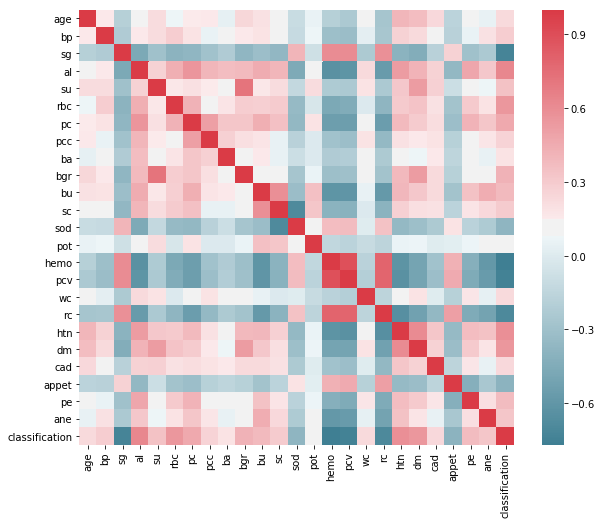

In [10]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
correl = data.corr()
sns.heatmap(correl, mask=np.zeros_like(correl, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [9]:
#To coerce them from object to numeric so that they can plotted on the heatmap
data['rc'] = data['rc'].apply(pd.to_numeric, errors='coerce')

data['wc'] = data['wc'].apply(pd.to_numeric, errors='coerce')

data['pcv'] = data['pcv'].apply(pd.to_numeric, errors='coerce')


In [11]:
#testing the data to fill in the null values, such that the mean doesn't vary much
mean_bp = data['bp'].mean()

#data = data[data.bgr.notnull()]

data['bp'] = data['bp'].fillna(mean_bp)

data['sg'] = data['sg'].fillna(data['sg'].mean())

data['al'] = data['al'].fillna(data['al'].median())

data['su'] = data['su'].fillna(data['su'].median())

data['pc'] = data['pc'].fillna(data['pc'].median())

data['bu'] = data['bu'].fillna(data['bu'].mean())

data['sc'] = data['sc'].fillna(data['sc'].mean())

data['htn'] = data['htn'].fillna(0)

data['dm'] = data['dm'].fillna(0)

data['pe'] = data['pe'].fillna(0)

data['rbc'] = data['rbc'].fillna(0)


In [12]:
data.describe()
#helps us analysing the means and the standard deviation that might have changed after the imputing
#and pre processing
#in this we get that after imputing the values the mean or the standard devaitions did not change much

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,400.000000,400.00000,398.000000,399.000000,400.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,0.90000,0.395000,0.117500,0.190000,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085427,0.794486,0.190000,0.150376,0.625000
std,17.169714,13.476298,0.005369,1.31313,1.040038,0.322418,0.392792,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.482728,0.47514,0.279868,0.404584,0.392792,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,78.234536,1.017408,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#to analyze which model is suitable for the problem, we try to analyze it through k-fold cross validation
data = data.reset_index(drop=True)
train = data[['bp','sg','al','su','pc','bu','sc','htn', 'dm', 'pe','rbc']]
target = data['classification']


In [14]:
#after comaprig the mean of the original data and the cleaned data, the means come out to be similar thus
#the distribution hasn't changede much.
#now standardising the dataset for inputing to predict the model
from sklearn import preprocessing
train = preprocessing.scale(train)

In [15]:
from sklearn.cross_validation import KFold
kf = KFold(356, n_folds=10, shuffle=False)


/home/rishabh/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, train, target, cv=10, scoring='accuracy')
print(scores.mean())

0.975


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
scores= cross_val_score(gnb, train, target, cv=10, scoring='accuracy')
print(scores.mean())

0.9574999999999999


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
scores= cross_val_score(clf, train, target, cv=10, scoring='accuracy')
print(scores.mean())

0.9525


In [19]:
#from the above we analyze the fact that all, the above ML models, work fine enough for the given problem
#this helps us in determining the fact that KNN with 5 neighbours is the optimum model for fitting our data

#now divide the data into train and test to fit the model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2)

In [20]:
#KNN model for prediction, with confusion matrix, and accuracy
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[31,  0],
       [ 2, 47]])

In [21]:
filename = 'KNN_FILE.sav'
pickle.dump(knn, open(filename, 'wb'))

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.975

In [23]:
#Classifying using Gausiaan Naive Bayes Classifier
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[31,  0],
       [ 5, 44]])

In [24]:
filename = 'Naibe_bayes_FILE.sav'
pickle.dump(gnb, open(filename, 'wb'))

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9375

In [26]:
#Classiying with Random Forest
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[31,  0],
       [ 3, 46]])

In [27]:
filename = 'Random_Forest_FILE.sav'
pickle.dump(clf, open(filename, 'wb'))

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9625